# Expedia Hotel Recommendations

##### Online travel agencies are scrambling to meet the artificial intelligence driven personalization standard set by companies like Amazon and Netflix. In addition, the world of online travel has become a highly competitive space where brands try to capture our attention (and wallet) with recommending, comparing, matching, and sharing. For this assignment, we would like to create the optimal hotel recommendations for Expedia’s users that are searching for a hotel to book. For this assignment, you need to predict which “hotel cluster” the user is likely to book, given his (or her) search details.

##### The data set can be found at Kaggle: Expedia Hotel Recommendations. To get started, I would suggest exploring the file train.csv, which contains the logs of user behavior.  There is another file named destinations.csv, which contains information related to hotel reviews made by users. There is a lot of data here, and making an accurate prediction is rather difficult, e.g., simply running a standard prediction algorithm will probably yield below 10% accuracy. Stary by doing some exploratory analysis of this data to help understand how to make a prediction on the hotel cluster the user is likely to select. Then, split train.csv into a training and test set (feel free to select a smaller random subset of train.csv). Then, build at least two prediction models from the training set, and report the accuracies on the test set. As I mentioned, this is a difficult problem, so be creative with your solutions. You might want to try building your own predictor rather than a standard predictor model, e.g., a random forest.  The purpose of this project is not necessarily to get great results but to understand the nuances and challenges of such problems.

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load CSV files and sample train at 10% due to it's massive size 
df = pd.read_csv('train.csv', sep=',').dropna()
dest = pd.read_csv('destinations.csv')
df = df.sample(frac=0.01, random_state=99)
df.shape

(241179, 24)

In [7]:
df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
32352134,2014-05-22 11:40:07,2,3,66,174,24103,2323.5232,802499,0,1,...,0,1,1442,3,0,1,4,125,177,44
29796021,2013-06-29 12:24:37,2,3,66,311,25538,2288.6121,85229,0,0,...,1,1,8272,1,0,1,2,50,659,59
15185156,2014-10-30 13:58:32,2,3,66,294,40046,587.6970,755217,0,1,...,0,1,11321,1,0,1,2,50,642,22
3301948,2014-08-22 20:14:34,2,3,66,332,55121,2234.4394,160733,0,1,...,0,1,1152,1,1,1,4,47,1502,65
25429119,2014-03-25 18:47:43,2,3,66,314,47869,839.0087,1078493,0,0,...,0,1,8284,1,0,4,2,50,685,6


In [10]:
# check for null values
df.isnull().sum()

date_time                    0
site_name                    0
posa_continent               0
user_location_country        0
user_location_region         0
user_location_city           0
orig_destination_distance    0
user_id                      0
is_mobile                    0
is_package                   0
channel                      0
srch_ci                      0
srch_co                      0
srch_adults_cnt              0
srch_children_cnt            0
srch_rm_cnt                  0
srch_destination_id          0
srch_destination_type_id     0
is_booking                   0
cnt                          0
hotel_continent              0
hotel_country                0
hotel_market                 0
hotel_cluster                0
dtype: int64

<Figure size 864x432 with 0 Axes>

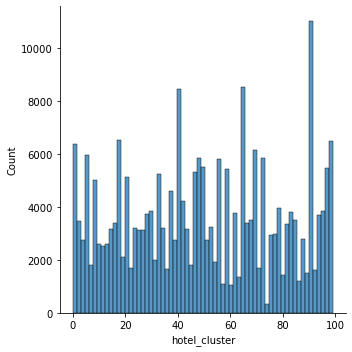

In [20]:
plt.figure(figsize=(12, 6))
sns.displot(df['hotel_cluster'])

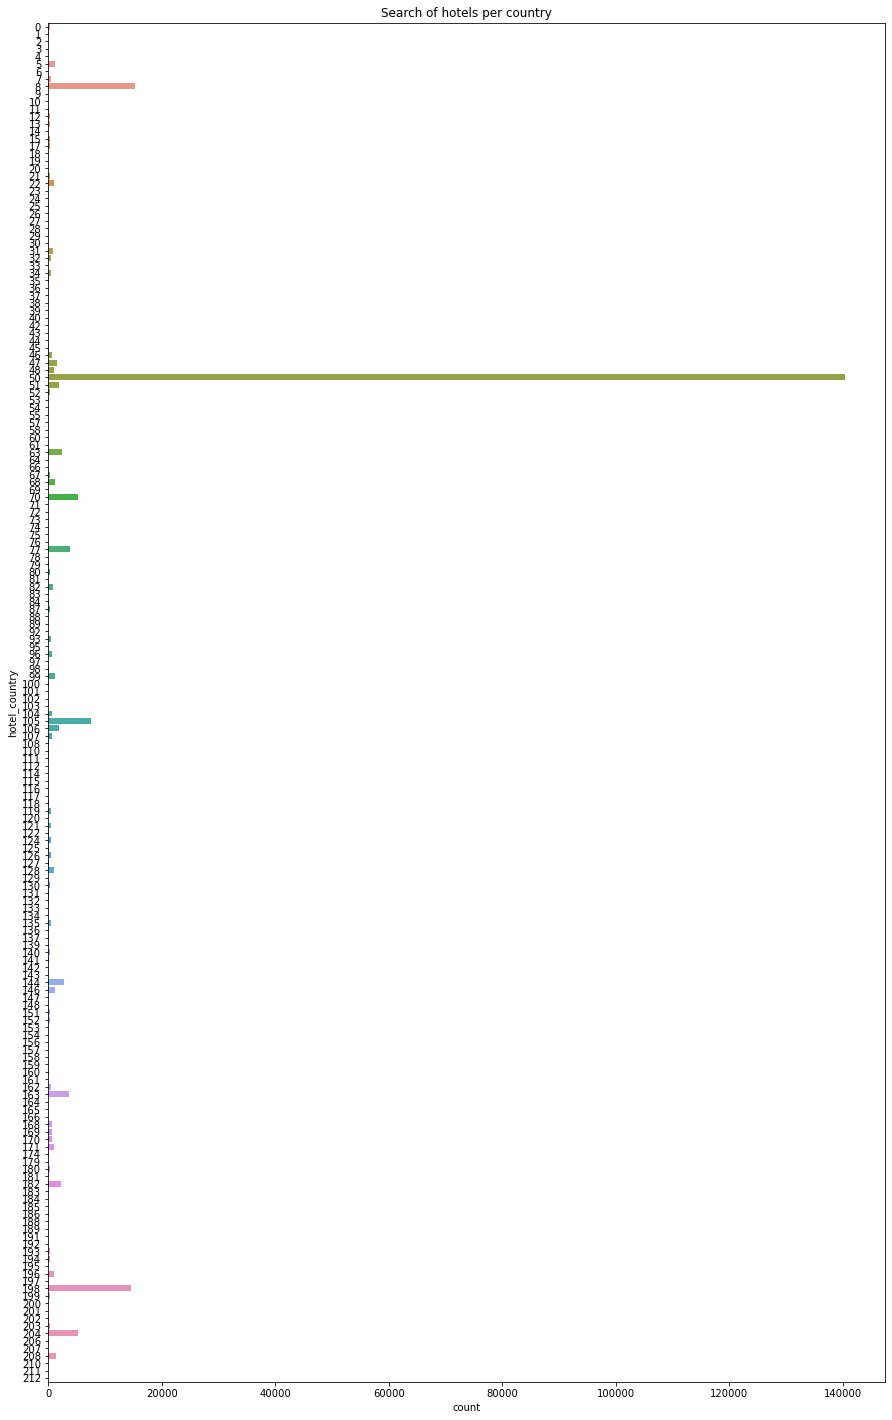

In [16]:

f, ax = plt.subplots(figsize=(15, 25))
sns.countplot(y='hotel_country', data=df)
plt.title('Search of hotels per country')
plt.show()

In [21]:
df.groupby('hotel_continent').count().sort_values(by='hotel_country')

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_country,hotel_market,hotel_cluster
hotel_continent,,,,,,,,,,,,,,,,,,,,,
5,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,...,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211
0,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,...,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748
3,13781,13781,13781,13781,13781,13781,13781,13781,13781,13781,...,13781,13781,13781,13781,13781,13781,13781,13781,13781,13781
4,32110,32110,32110,32110,32110,32110,32110,32110,32110,32110,...,32110,32110,32110,32110,32110,32110,32110,32110,32110,32110
6,35398,35398,35398,35398,35398,35398,35398,35398,35398,35398,...,35398,35398,35398,35398,35398,35398,35398,35398,35398,35398
2,154931,154931,154931,154931,154931,154931,154931,154931,154931,154931,...,154931,154931,154931,154931,154931,154931,154931,154931,154931,154931


In [3]:
# function to handle date
def convert_date_into_days(df):
    df['srch_ci'] = pd.to_datetime(df['srch_ci'])
    df['srch_co'] = pd.to_datetime(df['srch_co'])
    df['date_time'] = pd.to_datetime(df['date_time'])
    
    #create stay duration
    df['stay_dur'] = (df['srch_co'] - df['srch_ci']).astype('timedelta64[D]')
    
    #get number of days between booking
    df['no_of_days_bet_booking'] = (df['srch_ci'] - df['date_time']).astype('timedelta64[D]')
    
    #check in data (check out is redundant with stay duration)
    df['cin_day'] = df["srch_ci"].apply(lambda x: x.day)
    df['cin_month'] = df["srch_ci"].apply(lambda x: x.month)
    df['cin_year'] = df["srch_ci"].apply(lambda x: x.year)

In [4]:
convert_date_into_days(df)

In [25]:
df.info

<bound method DataFrame.info of                    date_time  site_name  posa_continent  \
32352134 2014-05-22 11:40:07          2               3   
29796021 2013-06-29 12:24:37          2               3   
15185156 2014-10-30 13:58:32          2               3   
3301948  2014-08-22 20:14:34          2               3   
25429119 2014-03-25 18:47:43          2               3   
...                      ...        ...             ...   
6109142  2013-08-13 03:02:28         13               1   
4062281  2014-01-27 06:20:45          2               3   
19011568 2014-11-09 21:29:47          2               3   
4430186  2013-03-02 12:26:34          2               3   
7170402  2013-08-04 08:44:59          2               3   

          user_location_country  user_location_region  user_location_city  \
32352134                     66                   174               24103   
29796021                     66                   311               25538   
15185156                    

/Users/ericdickey/opt/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


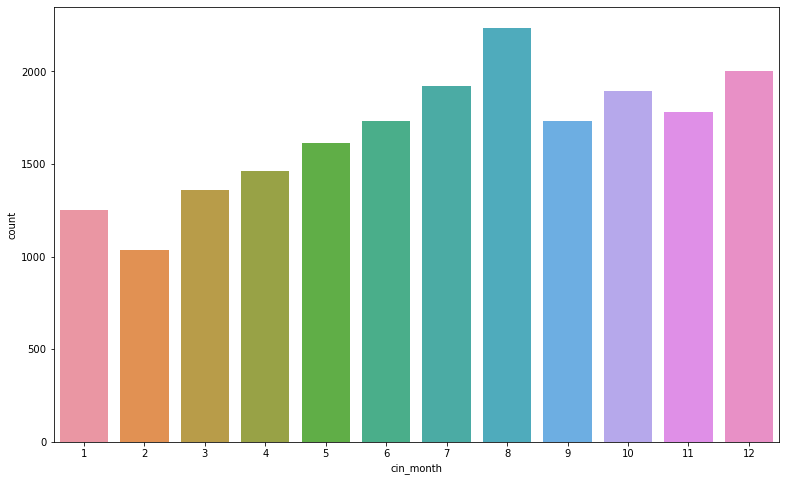

In [5]:
#dist of month booked
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('cin_month',data=df[df["is_booking"] == 1],order=list(range(1,13)),ax=ax)

/Users/ericdickey/opt/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


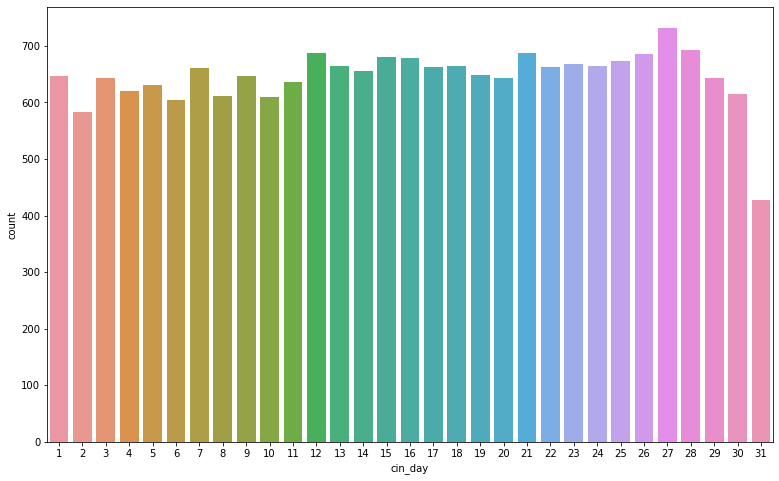

In [6]:
#dist of day booked
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('cin_day',data=df[df["is_booking"] == 1],order=list(range(1,32)),ax=ax)

In [7]:
# drop columns that are redundant or not used
column_drops=['date_time','srch_ci','srch_co','user_id']
df=df.drop(columns=column_drops)


In [8]:
# only look at bookings
df = df.loc[df['is_booking'] == 1]

In [9]:
#check correlation
df.corr()["hotel_cluster"]


site_name                   -0.018841
posa_continent               0.008707
user_location_country       -0.023580
user_location_region         0.015222
user_location_city           0.003102
orig_destination_distance    0.016554
is_mobile                   -0.002581
is_package                   0.031493
channel                      0.002360
srch_adults_cnt              0.010455
srch_children_cnt            0.016707
srch_rm_cnt                 -0.010043
srch_destination_id         -0.017470
srch_destination_type_id    -0.022760
is_booking                        NaN
cnt                         -0.003122
hotel_continent              0.002693
hotel_country               -0.015262
hotel_market                 0.020291
hotel_cluster                1.000000
stay_dur                     0.041831
no_of_days_bet_booking       0.024813
cin_day                      0.002112
cin_month                   -0.011642
cin_year                     0.004297
Name: hotel_cluster, dtype: float64

In [10]:
#train test split

y=df['hotel_cluster']
x=df.drop(columns='hotel_cluster')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=.3,random_state=10)

In [11]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)

In [12]:
#most important features

most_important=rf_model.feature_importances_
index_list=sorted(range(len(rf_model.feature_importances_)),
                  key=lambda i: rf_model.feature_importances_[i])[-10:]
imp_features=list(x.columns[index_list])

for i in index_list:
    print (round(rf_model.feature_importances_[i],3))
print(imp_features)

0.04
0.045
0.073
0.074
0.086
0.087
0.088
0.091
0.093
0.101
['channel', 'stay_dur', 'user_location_region', 'cin_month', 'cin_day', 'no_of_days_bet_booking', 'hotel_market', 'srch_destination_id', 'user_location_city', 'orig_destination_distance']


In [13]:
#check accuracy of RF

from sklearn import metrics
from sklearn.metrics import mean_squared_error
print("Accuracy Score: ", metrics.accuracy_score(y_test,y_pred_rf))
print("Mean^2 Error: ", metrics.mean_squared_error(y_test,y_pred_rf))

Accuracy Score:  0.09317803660565724
Mean^2 Error:  1694.3662229617305


In [14]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred_dt=dt_model.predict(X_test)

In [15]:
#most important features

most_important=dt_model.feature_importances_
index_list=sorted(range(len(dt_model.feature_importances_)),
                  key=lambda i: dt_model.feature_importances_[i])[-10:]
imp_features=list(x.columns[index_list])

for i in index_list:
    print (round(dt_model.feature_importances_[i],3))
print(imp_features)

0.041
0.05
0.066
0.072
0.082
0.083
0.097
0.098
0.101
0.114
['channel', 'stay_dur', 'hotel_market', 'user_location_region', 'cin_month', 'srch_destination_id', 'no_of_days_bet_booking', 'cin_day', 'user_location_city', 'orig_destination_distance']


In [16]:
#check accuracy of DT

from sklearn import metrics
from sklearn.metrics import mean_squared_error
print("Accuracy Score: ", metrics.accuracy_score(y_test,y_pred_dt))
print("Mean^2 Error: ", metrics.mean_squared_error(y_test,y_pred_dt))

Accuracy Score:  0.06306156405990017
Mean^2 Error:  1655.1542429284525


# #2 Model Method

In [17]:
slices = [df.groupby(['srch_destination_id','hotel_country','hotel_market',
                      'hotel_cluster'])['is_booking'].agg(['sum','count'])]
aggreg = pd.concat(slices).groupby(level=[0,1,2,3]).sum()
aggreg.dropna(inplace=True)
aggreg.head()

sum  count
srch_destination_id hotel_country hotel_market hotel_cluster            
4                   7             246          32               1      1
8                   50            416          7                2      2
                                               42               1      1
                                               43               1      1
                                               48               3      3

In [18]:
aggreg['sum_and_cnt'] = 0.85*aggreg['sum'] + 0.15*aggreg['count']
aggreg = aggreg.groupby(level=[0,1,2]).apply(lambda x: x.astype(float)/x.sum())
aggreg.reset_index(inplace=True)
aggreg.head()

,srch_destination_id,hotel_country,hotel_market,hotel_cluster,sum,count,sum_and_cnt
0,4,7,246,32,1.000,1.000,1.000
1,8,50,416,7,0.250,0.250,0.250
2,8,50,416,42,0.125,0.125,0.125
3,8,50,416,43,0.125,0.125,0.125
4,8,50,416,48,0.375,0.375,0.375


In [19]:
agg_pivot = aggreg.pivot_table(index=['srch_destination_id','hotel_country','hotel_market'], 
                               columns='hotel_cluster', values='sum_and_cnt').reset_index()
agg_pivot.head()

hotel_cluster,srch_destination_id,hotel_country,hotel_market,0,1,2,3,4,5,6,...,90,91,92,93,94,95,96,97,98,99
0,4,7,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,50,416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16,50,419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21,77,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,50,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.4,NaN,NaN,0.2,NaN,NaN,NaN,NaN,NaN


In [20]:
df_mer = pd.merge(df, dest, how='left', on='srch_destination_id')
df_mer = pd.merge(df, agg_pivot, how='left', on=['srch_destination_id','hotel_country','hotel_market'])
df_mer.fillna(0, inplace=True)
df_mer.shape

(20032, 125)

In [21]:
#train test split

x2=df_mer.drop(['hotel_cluster'], axis=1)
y2=df_mer.hotel_cluster

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x2,y2,test_size=.3,random_state=10)

In [22]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)

In [26]:
#check accuracy of RF

from sklearn import metrics
from sklearn.metrics import mean_squared_error
print("Accuracy Score: ", metrics.accuracy_score(y_test,y_pred_rf))
print("Mean^2 Error: ", metrics.mean_squared_error(y_test,y_pred_rf))

Accuracy Score:  0.2820299500831947
Mean^2 Error:  1283.0074875207986


In [28]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred_dt=dt_model.predict(X_test)

In [30]:
#check accuracy of DT

from sklearn import metrics
from sklearn.metrics import mean_squared_error
print("Accuracy Score: ", metrics.accuracy_score(y_test,y_pred_dt))
print("Mean^2 Error: ", metrics.mean_squared_error(y_test,y_pred_dt))

Accuracy Score:  0.22179700499168054
Mean^2 Error:  1371.110316139767
